<a href="https://colab.research.google.com/github/sathvika001/Mini-Project/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#preprocessing
#1.Resize
#2.flatten

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []


DATADIR = '/content/drive/MyDrive/project'
CATEGORIES = ['badminton_racket', 'bicycle', 'volleyball']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array,(150, 150, 3)) #normalizes the values to 0 to 1
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
len(flat_data[0])

67500

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

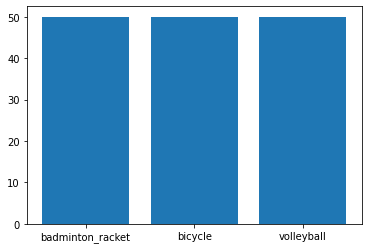

In [ ]:
unique, count = np.unique(target, return_counts = True)
plt.bar(CATEGORIES, count)

In [ ]:

#split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 100)

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C' :[1, 10, 100, 1000], 'kernel' :['linear']},
              { 'C' : [1, 10, 100, 1000], 'gamma' :[0.001, 0.0001], 'kernel' : ['rbf']},

]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [ ]:
y_test

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:

accuracy_score(y_pred, y_test)

0.9333333333333333

In [ ]:
confusion_matrix(y_pred, y_test)

array([[15,  0,  0],
       [ 1, 11,  2],
       [ 0,  0, 16]])

In [ ]:
#save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

In [ ]:
model = pickle.load(open('img_model.p', 'rb'))

enter your urlhttps://upload.wikimedia.org/wikipedia/commons/4/41/Left_side_of_Flying_Pigeon.jpg
(2371, 3556, 3)
PREDICTED OUTPUT: bicycle


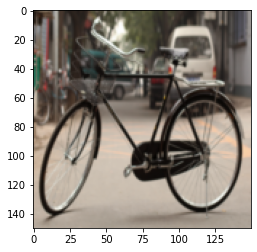

In [ ]:
#testing an image
flat_data = []
url = input("enter your url")
img = imread(url)
img_resized = resize(img, (150, 150, 3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized) 
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit  --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 7.8MB 4.3MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 4.2MB 28.1MB/s 
     |████████████████████████████████| 174kB 42.5MB/s 
     |████████████████████████████████| 112kB 46.0MB/s 
     |████████████████████████████████| 122kB 40.0MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
#Deployement
#WebApp - Streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image 
st.title('Image Classifier using Machine Learning')
st.text('Upload the image')

model = pickle.load(open('img_model.p', 'rb'))

uploaded_file = st.file_uploader("choose an image...", type = 'jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img, caption = "Uploaded Image")


  if st.button('PREDICT'):
    CATEGORIES = ['badminton_racket', 'bicycle', 'volleyball']
    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img, (150, 150, 3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


'http://5d9242265416.ngrok.io'